In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols: 'UsecolsArgType' = None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters: 'Mapping[Hashable, Callable] | None' = None, true_values: 'list | None' = None, false_values: 'list | None' = None, skipinitialspace: 'bool' = False, skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool | lib.NoDefault' = <no_default

In [50]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
     for filename in filenames:
         print(os.path.join(dirname, filename))

In [51]:
data_df = pd.read_csv("top_insta_influencers_data.csv")

In [52]:
data_df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [53]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None


In [54]:
data_df.duplicated().sum()

np.int64(0)

In [55]:
data_df.isnull().sum()

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [56]:
data_df.dropna(inplace = True)

In [57]:
data_df.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [58]:
data_df.shape

(138, 10)

In [59]:
(data_df.describe())

,rank,influence_score
count,138.000000,138.000000
mean,96.391304,81.652174
std,59.613528,8.720855
min,1.000000,41.000000
25%,47.250000,79.250000
50%,93.000000,83.000000
75%,145.250000,86.000000
max,200.000000,93.000000


In [60]:
 df = data_df['country'].value_counts()

In [61]:
df

country
United States             66
Brazil                    13
India                     12
Indonesia                  7
France                     6
Spain                      5
United Kingdom             4
Canada                     3
Colombia                   3
Netherlands                2
Turkey                     2
Mexico                     2
Uruguay                    1
Italy                      1
United Arab Emirates       1
Puerto Rico                1
Australia                  1
CÃ´te d'Ivoire             1
Anguilla                   1
Sweden                     1
Switzerland                1
British Virgin Islands     1
Czech Republic             1
Germany                    1
Russia                     1
Name: count, dtype: int64

In [62]:
type(df)

pandas.core.series.Series

In [63]:
data_df[['channel_info','followers','60_day_eng_rate']]

,channel_info,followers,60_day_eng_rate
0,cristiano,475.8m,1.39%
1,kyliejenner,366.2m,1.62%
3,selenagomez,342.7m,0.97%
4,therock,334.1m,0.20%
5,kimkardashian,329.2m,0.88%
...,...,...,...
195,iambeckyg,33.2m,1.40%
196,nancyajram,33.2m,0.64%
197,luansantana,33.2m,0.26%
198,nickjonas,33.0m,1.42%


In [64]:
replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
cols = ['followers', 'avg_likes', '60_day_eng_rate']
for col in cols:
    data_df[col] = data_df[col].replace(replace, regex=True).astype(float)

print("Conversion Done")

Conversion Done


In [65]:
print("Average Followers:", data_df['followers'].mean())
print("Top 5 Countries:\n", data_df['country'].value_counts().head())

Average Followers: 83726086.95652173
Top 5 Countries:
 country
United States    66
Brazil           13
India            12
Indonesia         7
France            6
Name: count, dtype: int64


In [66]:
df = data_df[data_df['60_day_eng_rate']>5]

In [67]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
56,57,bts.bighitofficial,78,1.2k,66900000.0,4100000.0,5.40,3.6m,4.9b,Uruguay
75,76,milliebobbybrown,80,0.28k,57600000.0,4000000.0,8.63,5.0m,1.1b,United States
78,79,karolg,83,3.3k,55600000.0,3100000.0,10.25,5.7m,10.1b,India
83,84,zacefron,86,0.66k,54500000.0,2300000.0,8.18,4.4m,1.5b,United States
114,115,harrystyles,57,0.59k,46900000.0,4700000.0,6.38,2.9m,2.8b,United States
118,119,zayn,82,0.16k,46500000.0,4700000.0,8.81,4.0m,773.5m,United States
120,121,travisscott,78,3.2k,46200000.0,3000000.0,5.71,2.6m,9.6b,United States
177,178,kimberly.loaiza,78,0.59k,35500000.0,2600000.0,5.23,1.8m,1.6b,Mexico


In [68]:
print("Average of 60_day_eng_rate:", data_df['60_day_eng_rate'].mean())
print("Top 25 channel_info:\n", data_df['channel_info'].value_counts().head(25))                       

Average of 60_day_eng_rate: 1.3315217391304348
Top 25 channel_info:
 channel_info
cristiano          1
kyliejenner        1
selenagomez        1
therock            1
kimkardashian      1
arianagrande       1
beyonce            1
khloekardashian    1
justinbieber       1
kendalljenner      1
natgeo             1
nike               1
taylorswift        1
jlo                1
nickiminaj         1
kourtneykardash    1
neymarjr           1
kevinhart4real     1
zendaya            1
iamcardib          1
ddlovato           1
badgalriri         1
theellenshow       1
realmadrid         1
champagnepapi      1
Name: count, dtype: int64


In [69]:
df = data_df.drop(["rank", "influence_score","posts","avg_likes","new_post_avg_like", "total_likes","country"],axis=1)
df.head(10)

,channel_info,followers,60_day_eng_rate
0,cristiano,475800000.0,1.39
1,kyliejenner,366200000.0,1.62
3,selenagomez,342700000.0,0.97
4,therock,334100000.0,0.20
5,kimkardashian,329200000.0,0.88
6,arianagrande,327700000.0,1.20
7,beyonce,272800000.0,0.76
8,khloekardashian,268300000.0,0.35
9,justinbieber,254500000.0,0.59
10,kendalljenner,254000000.0,2.04


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14072\3243916294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country, y=name_countries, palette='viridis')


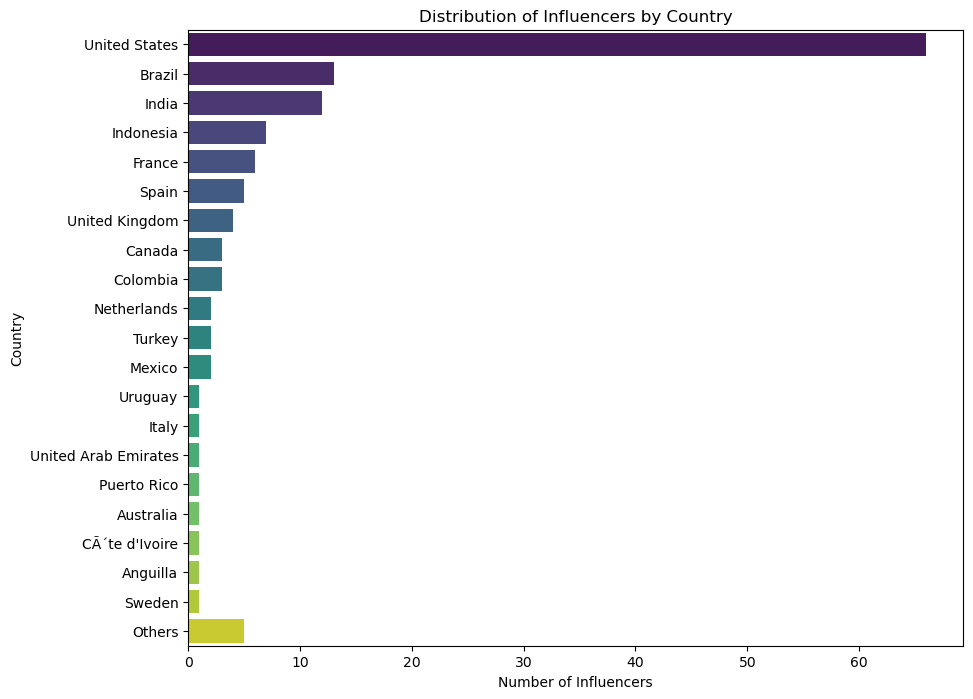

In [70]:
country= data_df['country'].value_counts()[:20].to_list()
name_countries = data_df['country'].value_counts().index[:20].to_list()
name_countries.append("Others")
max20 = sum(country)
others = len(data_df)- max20
country.append(others)
plt.figure(figsize=(10, 8))
sns.barplot(x=country, y=name_countries, palette='viridis')
plt.title('Distribution of Influencers by Country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

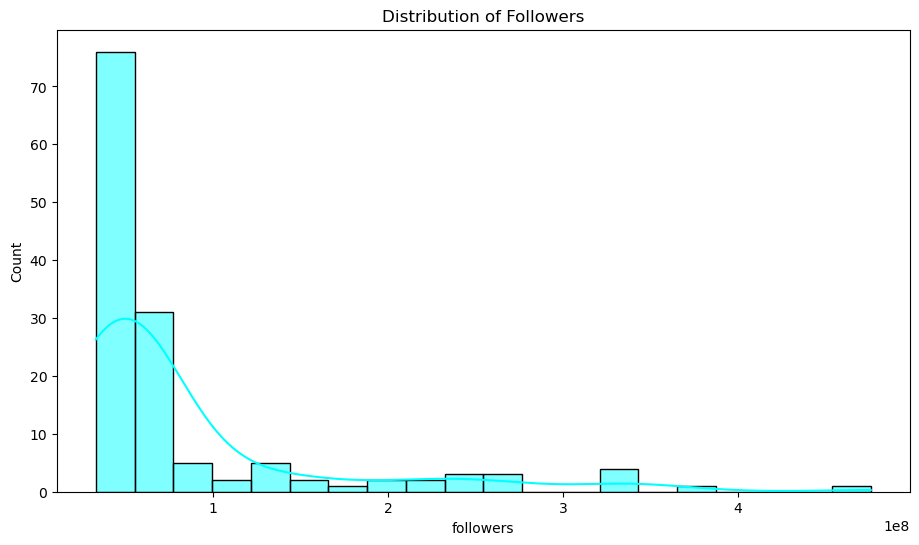

In [71]:
plt.figure(figsize=(11,6))
sns.histplot(data_df['followers'], bins=20, kde=True, color='aqua')
plt.title("Distribution of Followers")
plt.show()

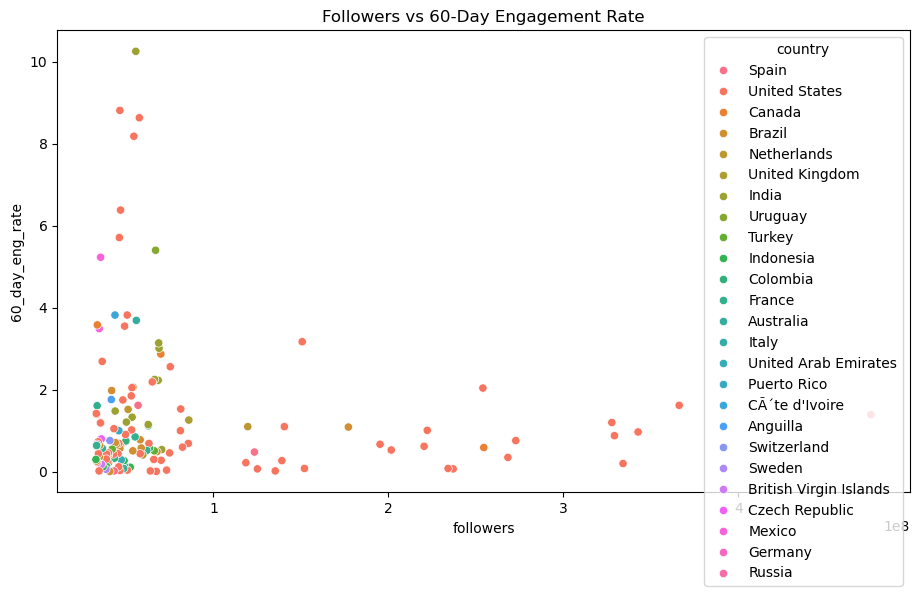

In [72]:
plt.figure(figsize=(11,6))
sns.scatterplot(data=data_df , x='followers', y='60_day_eng_rate', hue='country')
plt.title("Followers vs 60-Day Engagement Rate")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14072\2361239065.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values,palette="Paired")


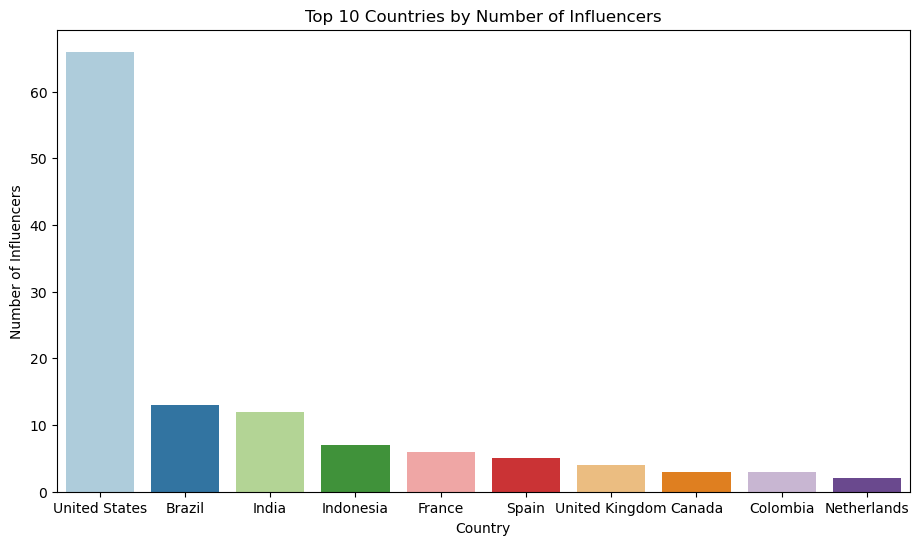

In [73]:
top_countries = data_df['country'].value_counts().head(10)
plt.figure(figsize=(11,6))
sns.barplot(x=top_countries.index, y=top_countries.values,palette="Paired")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

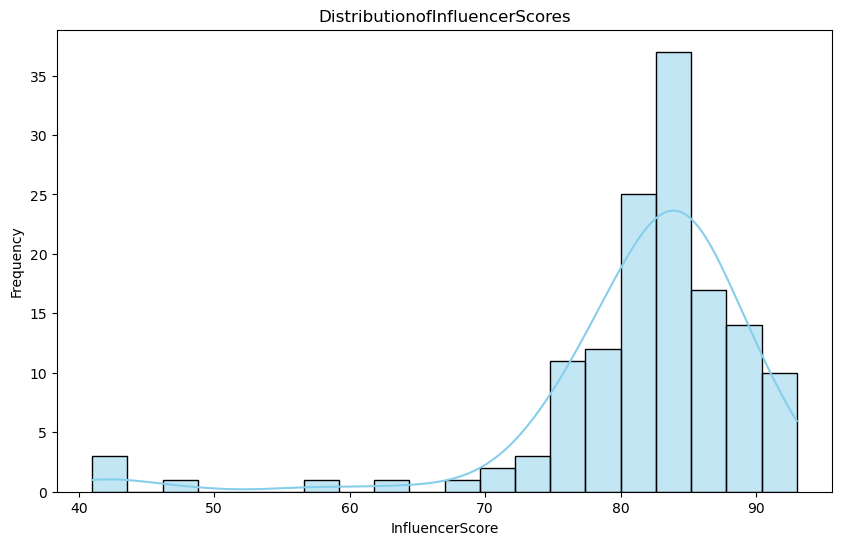

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(data_df['influence_score'], kde=True, color='skyblue')
plt.title('DistributionofInfluencerScores')
plt.xlabel('InfluencerScore')
plt.ylabel('Frequency')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [76]:
features = data_df[['followers', 'influence_score', 'country']]
target = data_df['60_day_eng_rate']

In [77]:
encoder = LabelEncoder()

In [78]:
from sklearn.preprocessing import LabelEncoder

# Assuming features is your DataFrame (e.g., features = insta_df[['country', 'other_cols']])

# Check if 'category' exists; if not, skip
if 'category' in features.columns:
    encoder = LabelEncoder()
    features['category_encoded'] = encoder.fit_transform(features['category'])
else:
    print("Column 'category' not found. Skipping encoding for 'category'.")

# Encode 'country' if it exists
if 'country' in features.columns:
    encoder = LabelEncoder()
    features['country_encoded'] = encoder.fit_transform(features['country'])
    print("Encoding completed for 'country'.")
else:
    print("Column 'country' not found.")

# Optional: Verify
print("Encoded columns:")
if 'country_encoded' in features.columns:
    print(features[['country_encoded']].head())
else:
    print("No encoded columns.")


Column 'category' not found. Skipping encoding for 'category'.
Encoding completed for 'country'.
Encoded columns:
   country_encoded
0               17
1               23
3               23
4               23
5               23


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14072\3837643632.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['country_encoded'] = encoder.fit_transform(features['country'])


In [79]:
features=features[['followers','influence_score', 'country_encoded']]
features

,followers,influence_score,country_encoded
0,475800000.0,92,17
1,366200000.0,91,23
3,342700000.0,93,23
4,334100000.0,91,23
5,329200000.0,91,23
...,...,...,...
195,33200000.0,71,23
196,33200000.0,81,8
197,33200000.0,79,2
198,33000000.0,78,23


In [80]:
X_train,X_test,y_train,y_test=train_test_split(features, target,test_size=0.1,random_state=42)
print("TTSDone")

TTSDone


In [81]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
print("TrainingCompleted")

TrainingCompleted


In [82]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Training Completed")

Training Completed


In [83]:
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [84]:
lr_preds

array([1.37028635, 1.30255527, 1.01603073, 1.49674945, 1.12804654,
       1.37867911, 1.38950008, 1.32829439, 1.45159326, 1.39365706,
       1.40583913, 1.28780069, 1.42115805, 1.54741186])

In [85]:
predictions_df = X_test.copy()
predictions_df['Actual Engagement Rate'] = y_test.values
predictions_df['Predicted Engagement Rate'] = lr_preds

In [86]:
predictions_df.head()

,followers,influence_score,country_encoded,Actual Engagement Rate,Predicted Engagement Rate
122,45900000.0,80,15,1.00,1.370286
149,40000000.0,85,17,0.41,1.302555
13,222200000.0,91,23,1.01,1.016031
33,85900000.0,74,22,1.26,1.496749
85,53900000.0,86,2,0.51,1.128047


In [87]:
data_df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475800000.0,8700000.0,1.39,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366200000.0,8300000.0,1.62,5.9m,57.4b,United States
3,4,selenagomez,93,1.8k,342700000.0,6200000.0,0.97,3.3m,11.5b,United States
4,5,therock,91,6.8k,334100000.0,1900000.0,0.20,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329200000.0,3500000.0,0.88,2.9m,19.9b,United States


In [88]:
# Assuming data_df is loaded and '60_day_eng_rate' is numeric
# Calculate max and ensure bins are monotonic
maximum_rate = data_df['60_day_eng_rate'].max()
bins = [0, 1, 3, maximum_rate]
bins = sorted(bins)  # Sort to ensure monotonicity
labels = ['Low', 'Medium', 'High']

# Apply pd.cut
data_df['engagement_rate_class'] = pd.cut(data_df['60_day_eng_rate'], bins=bins, labels=labels)

# Display the result
print(data_df.head(20))

    rank     channel_info  influence_score  posts    followers  avg_likes  \
0      1        cristiano               92   3.3k  475800000.0  8700000.0   
1      2      kyliejenner               91   6.9k  366200000.0  8300000.0   
3      4      selenagomez               93   1.8k  342700000.0  6200000.0   
4      5          therock               91   6.8k  334100000.0  1900000.0   
5      6    kimkardashian               91   5.6k  329200000.0  3500000.0   
6      7     arianagrande               92   5.0k  327700000.0  3700000.0   
7      8          beyonce               92   2.0k  272800000.0  3600000.0   
8      9  khloekardashian               89   4.1k  268300000.0  2400000.0   
9     10     justinbieber               91   7.4k  254500000.0  1900000.0   
10    11    kendalljenner               90  0.66k  254000000.0  5500000.0   
11    12           natgeo               91  10.0k  237000000.0   302200.0   
12    13             nike               90  0.95k  234100000.0   329000.0   

In [89]:
#high engagement rate
engagement_df= data_df[data_df['engagement_rate_class']=="High"] 
engagement_df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,engagement_rate_class
22,23,zendaya,87,3.5k,150700000.0,5800000.0,3.17,4.8m,20.6b,United States,High
50,51,narendramodi,85,0.54k,68900000.0,2900000.0,3.01,2.0m,1.6b,India,High
51,52,aliaabhatt,82,1.8k,68700000.0,1800000.0,3.14,2.1m,3.3b,India,High
56,57,bts.bighitofficial,78,1.2k,66900000.0,4100000.0,5.40,3.6m,4.9b,Uruguay,High
75,76,milliebobbybrown,80,0.28k,57600000.0,4000000.0,8.63,5.0m,1.1b,United States,High
77,78,chrishemsworth,86,0.88k,55900000.0,2800000.0,3.69,2.1m,2.5b,Australia,High
78,79,karolg,83,3.3k,55600000.0,3100000.0,10.25,5.7m,10.1b,India,High
83,84,zacefron,86,0.66k,54500000.0,2300000.0,8.18,4.4m,1.5b,United States,High
97,98,adele,84,0.42k,50700000.0,4700000.0,3.82,1.9m,2.0b,United States,High
103,104,lelepons,81,2.5k,49200000.0,2400000.0,3.55,1.7m,6.1b,United States,High


In [90]:
ncoder=LabelEncoder()
data_df['country_encoded']=encoder.fit_transform(data_df['country'])

In [91]:
features = data_df[['followers', 'influence_score', 'country_encoded']]
target = data_df['engagement_rate_class']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print("TTS Completed")

TTS Completed


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

In [94]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
print("Model Trained")

Model Trained


In [95]:
y_pred = classifier.predict(X_test)
y_pred

array(['Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low', 'Low',
       'Low', 'Low'], dtype=object)

In [96]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:" + str(float(accuracy)*100) + "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Ideal f1: >0.7")
print("Ideal recall =: 1.0")

Accuracy:50.0%

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       0.50      1.00      0.67        13
      Medium       0.50      0.09      0.15        11

    accuracy                           0.50        28
   macro avg       0.33      0.36      0.27        28
weighted avg       0.43      0.50      0.37        28

Ideal f1: >0.7
Ideal recall =: 1.0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [97]:
from sklearn.metrics import confusion_matrix

In [98]:
 conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

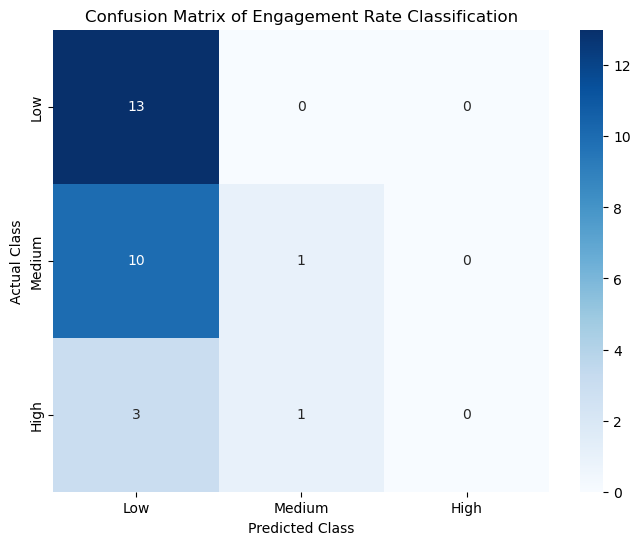

In [99]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix of Engagement Rate Classification')
plt.show()

In [100]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14072\2277458813.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, order=labels, palette="viridis")


Text(0, 0.5, 'Count')

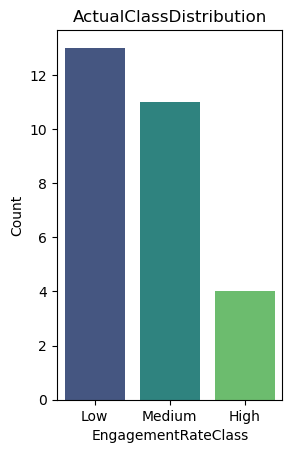

In [101]:
plt.subplot(1, 2, 1)
sns.countplot(x=y_test, order=labels, palette="viridis")
plt.title("ActualClassDistribution")
plt.xlabel("EngagementRateClass")
plt.ylabel("Count")

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14072\2278929396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred,order=labels,palette="viridis")


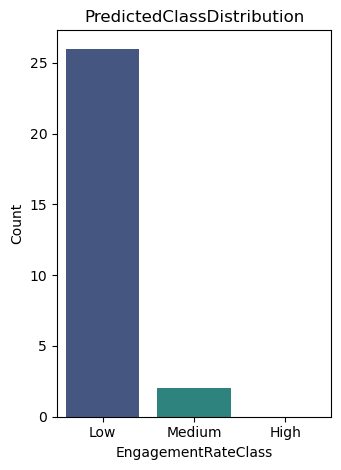

In [102]:
plt.subplot(1,2,2)
sns.countplot(x=y_pred,order=labels,palette="viridis")
plt.title("PredictedClassDistribution")
plt.xlabel("EngagementRateClass")
plt.ylabel("Count")
plt.tight_layout()
plt.show()